In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

from matplotlib.pylab import rcParams

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
#conda install -c anaconda pyramid 
import pyramid as pm
from sklearn import metrics
#pip install pyramid-arima
from pyramid.arima import auto_arima

warnings.filterwarnings('ignore')

C:\Users\Somesh\Anaconda3\lib\site-packages\pyramid\__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    
  """, UserWarning)


In [2]:
#print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

In [3]:
flight_data = sns.load_dataset('flights')
flight_data.head()
flight_data.tail()
flight_data.shape
flight_data.describe()
flight_data.info()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


,year,month,passengers
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390
143,1960,December,432


(144, 3)

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
year          144 non-null int64
month         144 non-null category
passengers    144 non-null int64
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [4]:
flight_data_pivot = flight_data.pivot('month','year','passengers')
flight_data_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


We will now generate heat map to visualize seasonality of the travelers by each month. It can easily be seen that traffic in a year peaks during summer months of July and August

<Figure size 1080x576 with 0 Axes>

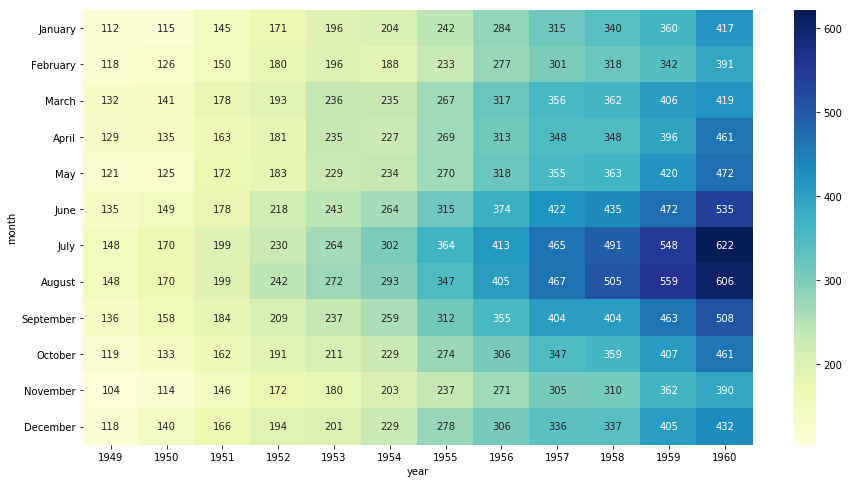

In [5]:
plt.figure(figsize=(15,8))
sns.heatmap(flight_data_pivot, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

Create a date range variable which captures date range of the above data. We are using Pandas “date_range” method to create timestamped variable on a monthly basis.

In [6]:
month = pd.date_range('19490121', periods=144, freq='M')
month

DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='M')

In [7]:
flight_data['datestamp'] = month
flight_data.head()

,year,month,passengers,datestamp
0,1949,January,112,1949-01-31
1,1949,February,118,1949-02-28
2,1949,March,132,1949-03-31
3,1949,April,129,1949-04-30
4,1949,May,121,1949-05-31


Select only selected variables by variable names. In this case we are selecting dateime and # passengers data using loc

In [8]:
data = flight_data.loc[:,('datestamp','passengers')]
data.head()
data.describe()

,datestamp,passengers
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121


,passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


Reindex using method “set_index” the data on datetime variable

In [9]:
data.set_index('datestamp', inplace=True)
data.head()

,passengers
datestamp,
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


Plot the timeseries data, add x label, y label and title of the plot

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Passengers in 1000')

Text(0.5, 1.0, '# of passengers Over Time')

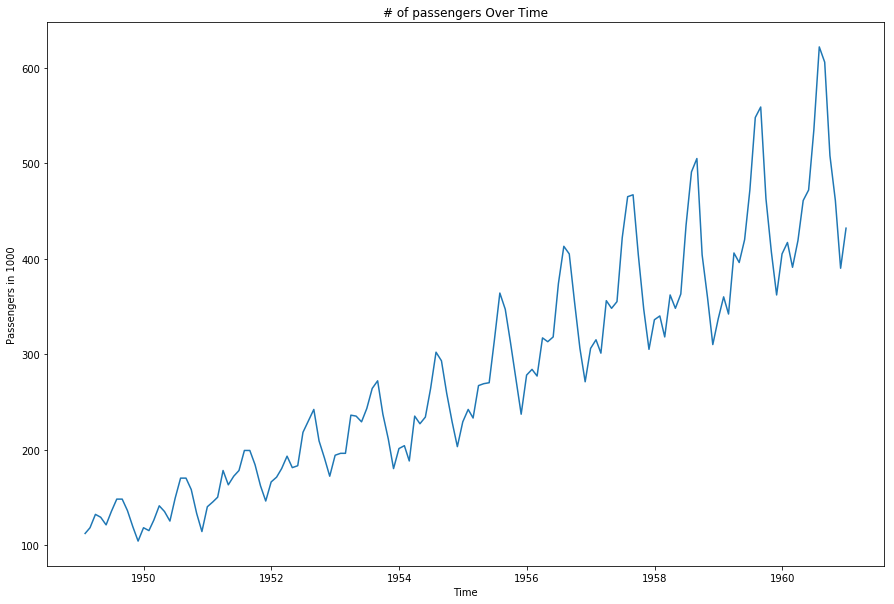

In [10]:
plt.figure(figsize=(15,10))
plt.plot(data)
plt.xlabel('Time')
plt.ylabel('Passengers in 1000')
plt.title ('# of passengers Over Time')
plt.show()

Decompose timeseries to trend, seasonal and random components using multiplicative model and do subplots with color schemes using hex color picker codes.

In [11]:
decomposition = seasonal_decompose(data, model='multiplicative')

<Figure size 1440x720 with 0 Axes>

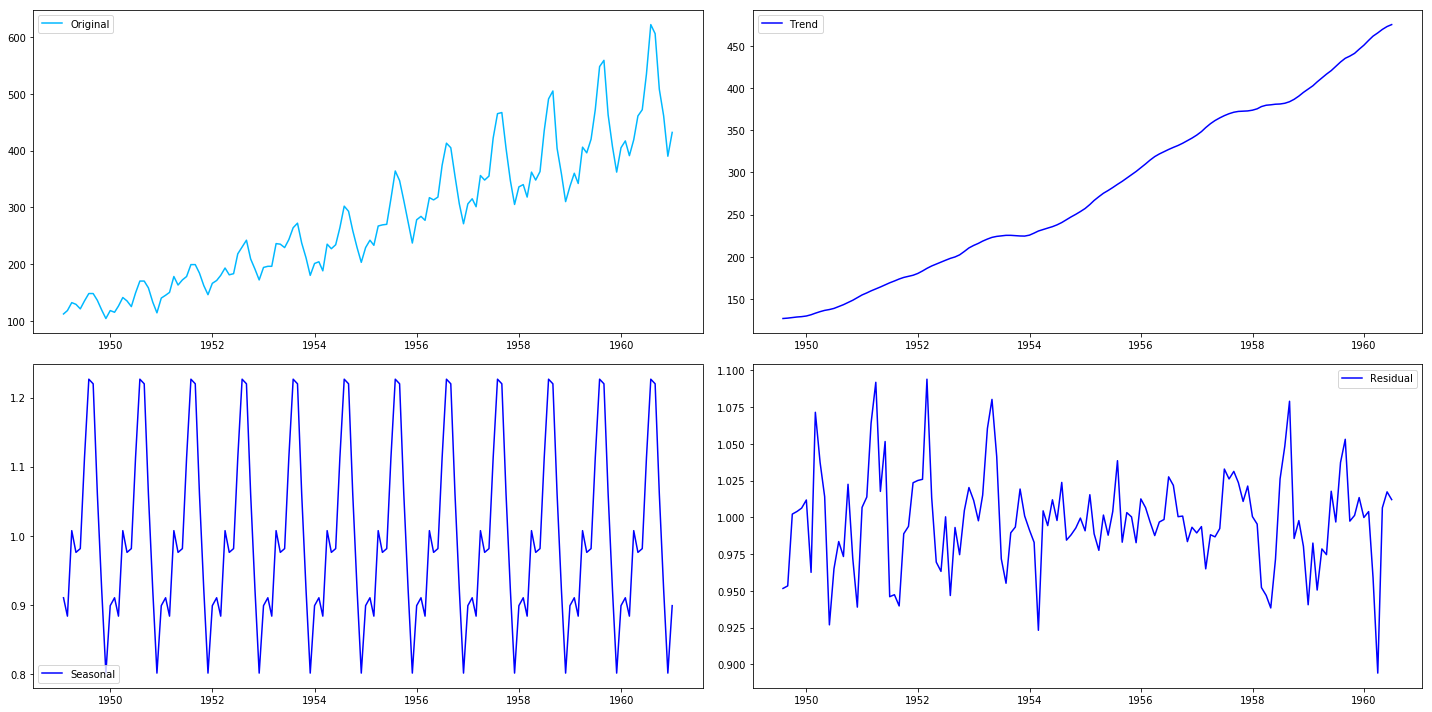

In [12]:
# plot trend of the series
plt.figure(figsize=(20,10))

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(221)
plt.plot(data, color='#00b8ff', label='Original')
plt.legend(loc='best')
plt.subplot(222)
plt.plot(trend, 'b', label='Trend')
plt.legend(loc='best')

plt.subplot(223)
plt.plot(seasonal, 'b', label='Seasonal')
plt.legend(loc='best')

plt.subplot(224)
plt.plot(residual, 'b', label='Residual')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


Similarly you can decompose timeseries to trend, seasonal and random components using additive model using the below code

In [13]:
decomposition1 = seasonal_decompose(data, model='additive')

<Figure size 1440x720 with 0 Axes>

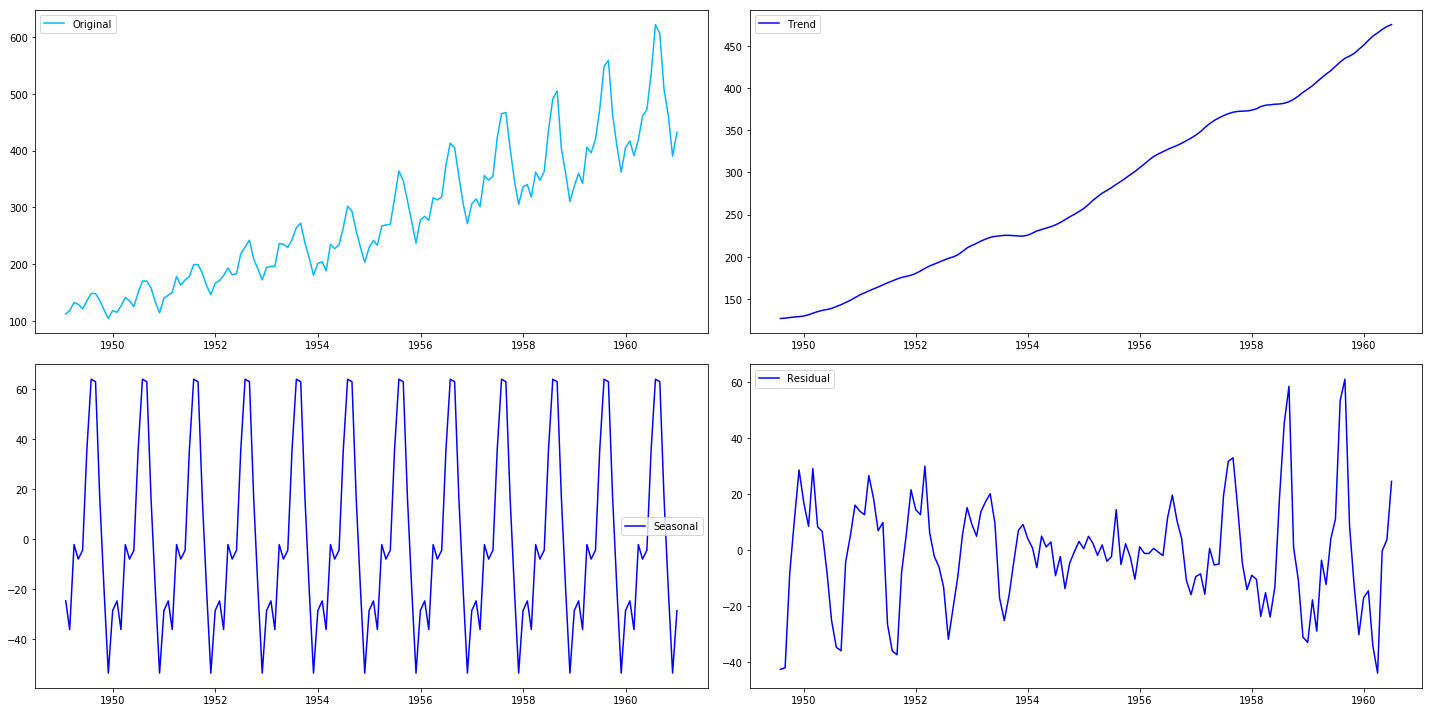

In [14]:
# plot trend of the series
plt.figure(figsize=(20,10))

trend = decomposition1.trend
seasonal = decomposition1.seasonal
residual = decomposition1.resid

plt.subplot(221)
plt.plot(data, color='#00b8ff', label='Original')
plt.legend(loc='best')
plt.subplot(222)
plt.plot(trend, 'b', label='Trend')
plt.legend(loc='best')

plt.subplot(223)
plt.plot(seasonal, 'b', label='Seasonal')
plt.legend(loc='best')

plt.subplot(224)
plt.plot(residual, 'b', label='Residual')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


Test for the stationarity of the time series using Augmented Dickey Fuller Test. Since p value is higher than alpha, we can’t reject the null hypothesis (Series is non stationary). Therefore, we would need to use the “Integrated (I)” term of the time series in a good model.

In [15]:
data.head()
data.shape

,passengers
datestamp,
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


(144, 1)

In [16]:
from pyramid.arima.stationarity import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.is_stationary(data)

(0.99, False)

In [17]:
train, test = data[:100], data[100:]
train.shape

test.shape

(100, 1)

(44, 1)

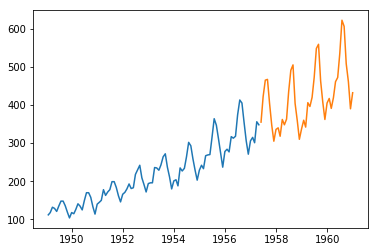

In [18]:
plt.plot(train)
plt.plot(test)
plt.show()

Now is the time that we can fit a Auto ARIMA model, which works on the efficient Grid Search and Random Search concepts to find the most optimal parameters to find the best fitting time series model. Please keep in mind that small p,d,q represent the non-seasonal components and capital P,D,Q represent seasonal components.

In this case, we are trying values from 1 to 8 for each of the above parameters in the efficient parameters search.

In [19]:
Arima_model = auto_arima(train, start_p=1, start_q=1, max_p=8, max_q=8, start_P=0, start_Q=0,
                        max_P=8, max_Q=8, m=12, seasonal=True, trace=True, d=1, D=1, error_action='warn',
                        suppress_warnings=True, stepwise=True, random_state=20, n_fits=30)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=649.156, BIC=659.019, Fit time=0.156 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=652.680, BIC=657.612, Fit time=0.031 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=645.943, BIC=655.806, Fit time=0.296 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=646.447, BIC=656.311, Fit time=0.269 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=647.792, BIC=655.190, Fit time=0.094 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=647.917, BIC=660.247, Fit time=0.721 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=647.931, BIC=660.261, Fit time=0.423 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=645.798, BIC=660.593, Fit time=2.549 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=652.514, BIC=664.843, Fit time=1.110 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(2, 

In [20]:
Arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  100
Model:             SARIMAX(1, 1, 0)x(2, 1, 1, 12)   Log Likelihood                -316.899
Date:                            Sun, 17 Feb 2019   AIC                            645.798
Time:                                    21:42:22   BIC                            660.593
Sample:                                         0   HQIC                           651.756
                                            - 100                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0058      0.277      0.021      0.983      -0.537       0.549
ar.L1         -0.3009      0.097     -3.118      0.002      -0.490      -0.112
ar.S.L12       0.6821      0.125      5.450      0.000       0.437       0.927
ar.S.L24       0.3161      0.100      3.150      0.002       0.119       0.513
ma.S.L12      -0.9765      0.557     -1.752      0.080      -2.069       0.116
sigma2        76.0898     37.556      2.026      0.043       2.481     149.698
===================================================================================
Ljung-Box (Q):                       39.55   Jarque-Bera (JB):                 3.14
Prob(Q):                              0.49   Prob(JB):                         0.21
Heteroskedasticity (H):               1.31   Skew:                             0.46
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Use the best model to make predictions about the Test data-

In [21]:
prediction = pd.DataFrame(Arima_model.predict(n_periods=44), index=test.index)
prediction.columns = ['Predicted_Passenges']

Here is how the predicted values for the test time period looks like-

In [22]:
prediction

,Predicted_Passenges
datestamp,
1957-05-31,355.019653
1957-06-30,411.284335
1957-07-31,456.688464
1957-08-31,444.640166
1957-09-30,395.471654
1957-10-31,346.811456
1957-11-30,308.947469
1957-12-31,349.201087
1958-01-31,359.241884


Plot actual vs predicted values for the training and the test data-

<Figure size 1080x720 with 0 Axes>

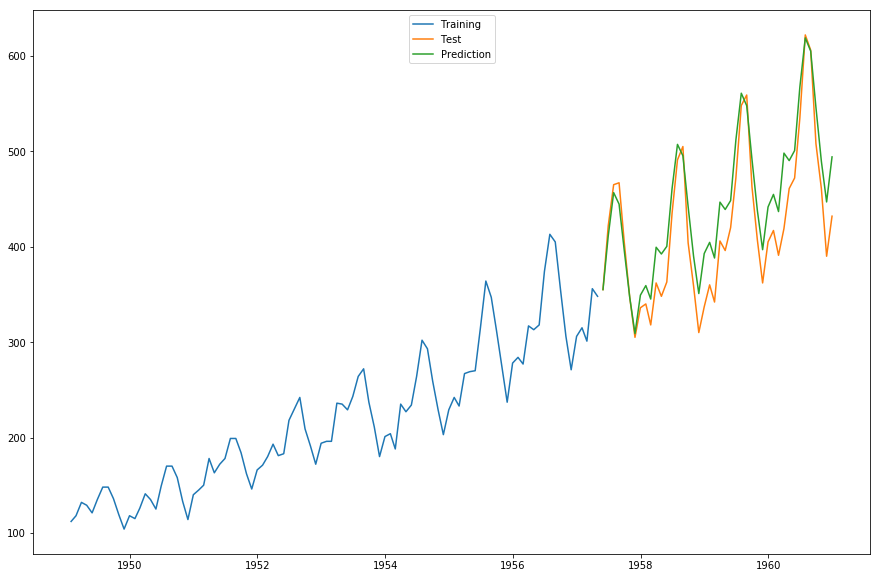

In [23]:
plt.figure(figsize=(15,10))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(prediction, label = 'Prediction')
plt.legend(loc= 'upper center')
plt.show()

Add the predicted values in the original “Test” data to compute error in predictions. Sample output is shown below as well.

In [24]:
test['Predicted_Passengers'] = prediction
test['Error'] = test['passengers'] - test['Predicted_Passengers']
test

,passengers,Predicted_Passengers,Error
datestamp,,,
1957-05-31,355,355.019653,-0.019653
1957-06-30,422,411.284335,10.715665
1957-07-31,465,456.688464,8.311536
1957-08-31,467,444.640166,22.359834
1957-09-30,404,395.471654,8.528346
1957-10-31,347,346.811456,0.188544
1957-11-30,305,308.947469,-3.947469
1957-12-31,336,349.201087,-13.201087
1958-01-31,340,359.241884,-19.241884


Compute error metrics such as Mean Absolute Error, Mean Squared Error and Median Absolute Error.

In [25]:
metrics.mean_absolute_error(test.passengers, test.Predicted_Passengers)

29.338226544329984

In [26]:
metrics.mean_squared_error(test.passengers, test.Predicted_Passengers)

1171.8088030151011

In [27]:
metrics.median_absolute_error(test.passengers, test.Predicted_Passengers)

30.047862495367497

Now we can generate model diagnostic metrics as discussed in the links at the very beginning of this article. Overall, model performance looks quite robust from these charts.

<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'Error Distribution Over Time')

((array([-2.15374952, -1.77530174, -1.55088744, -1.38514138, -1.25057432,
         -1.1354892 , -1.03375442, -0.94172868, -0.85705923, -0.7781294 ,
         -0.70377435, -0.63312213, -0.5654989 , -0.50036931, -0.43729746,
         -0.3759202 , -0.31592847, -0.25705362, -0.19905725, -0.14172333,
         -0.08485191, -0.02825382,  0.02825382,  0.08485191,  0.14172333,
          0.19905725,  0.25705362,  0.31592847,  0.3759202 ,  0.43729746,
          0.50036931,  0.5654989 ,  0.63312213,  0.70377435,  0.7781294 ,
          0.85705923,  0.94172868,  1.03375442,  1.1354892 ,  1.25057432,
          1.38514138,  1.55088744,  1.77530174,  2.15374952]),
  array([-7.90926223e+01, -6.21484356e+01, -5.69226319e+01, -5.58411507e+01,
         -4.61540925e+01, -4.58335412e+01, -4.45445414e+01, -4.43495487e+01,
         -4.30035362e+01, -4.08960795e+01, -4.07198259e+01, -3.96708291e+01,
         -3.79854832e+01, -3.79751488e+01, -3.78103339e+01, -3.74318067e+01,
         -3.73489753e+01, -3.66394664

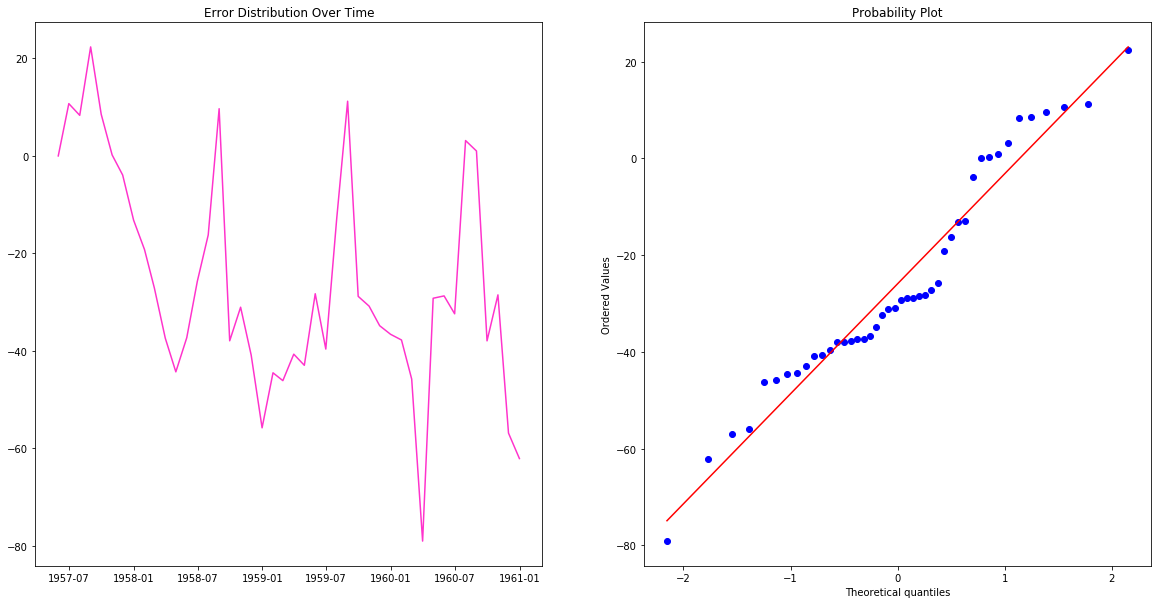

<Figure size 1440x720 with 0 Axes>

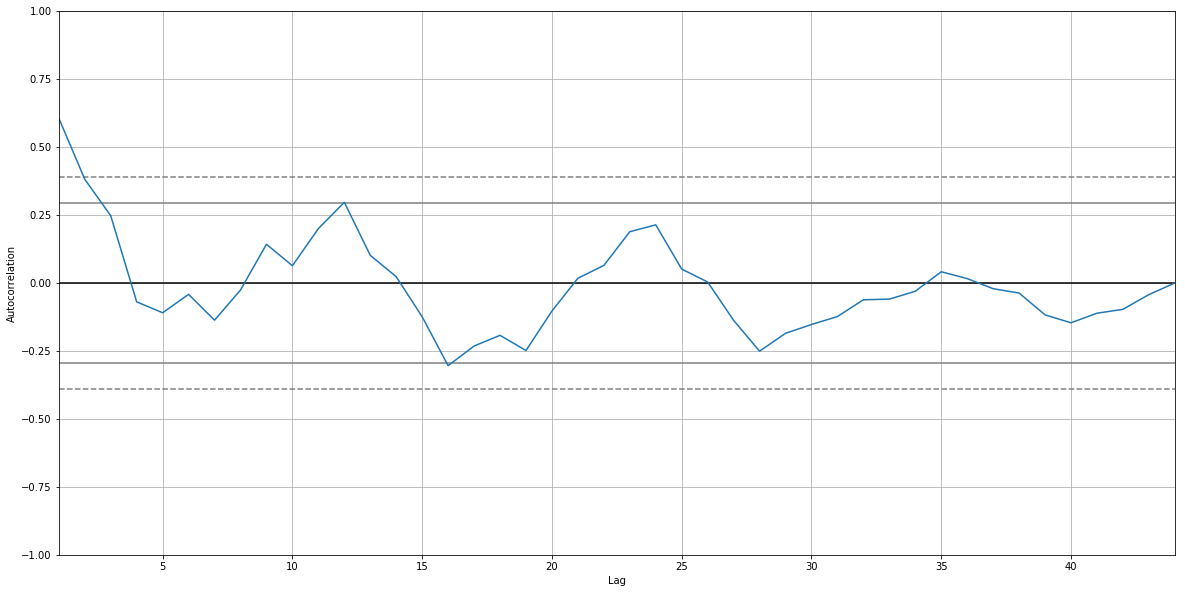

In [28]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(test.Error, color="#ff33CC")
plt.title('Error Distribution Over Time')
plt.subplot(122)
scipy.stats.probplot(test.Error, plot=plt)
plt.show()

plt.figure(figsize=(20,10))
pm.autocorr_plot(test.Error)
plt.show()

In sum, we built a time-series model using Pyramid-Arima package and used optimized grid search to find the best parameters. Overall the performance of this model is quite satisfactory.